**support Vector machine (SVM)**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
from sklearn.svm import SVC
from sklearn import datasets  


In [75]:
iris = datasets.load_iris()

In [77]:
X = iris['data'][:,(2,3)]

In [79]:
y=iris['target']

In [81]:
setosa_or_versicolor =(y ==0)|(y==1)
X =X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

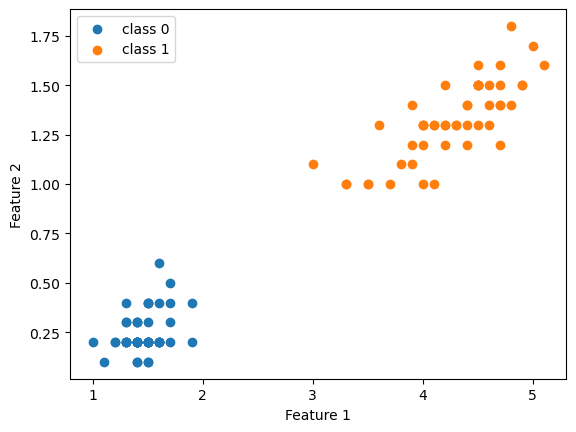

In [83]:
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your label array
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="class 1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [85]:
from sklearn.svm import SVC

# SVM classifier model with a large C value
svm_clf = SVC(kernel='linear', C=1e10)  # or some other large finite number

# Fit the model
svm_clf.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [87]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [89]:
svm_clf.intercept_

array([-3.78823471])

In [91]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w =svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 =np.linspace(xmin,xmax,200)
    decision_boundary =-w[0]/w[1]*x0 -b/w[1]
    margin = 1/w[1]
    gutter_up =decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs =svm_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolors ='#FFAAAA', label ="support vectors")
    plt.plot(x0, decision_boundary, "k-", linewidth = 2, label = "Hyperplane")
    plt.plot(x0, gutter_up, "k--", linewidth =2)
    plt.plot(x0, gutter_down, "k--", linewidth =2)
    plt.legend()

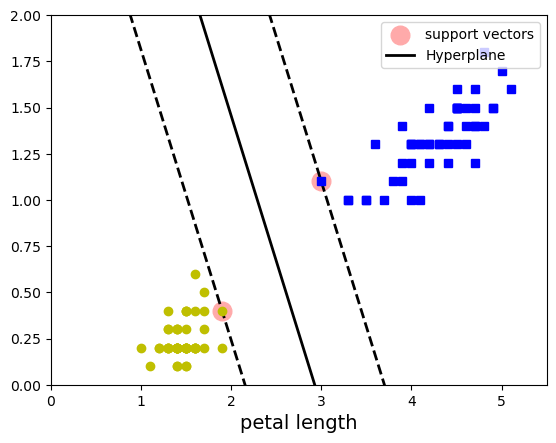

In [93]:
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
plt.xlabel("petal length", fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

In [95]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

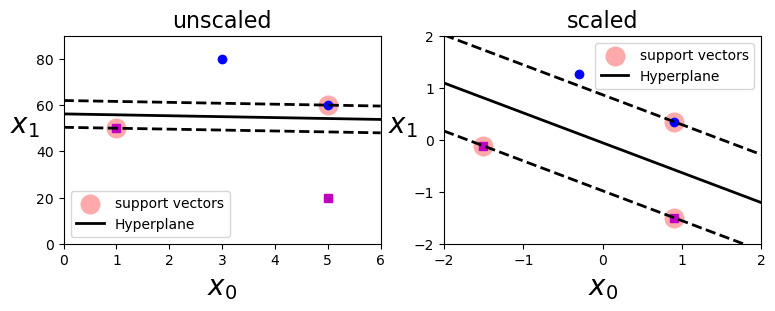

In [97]:
#why scaling is important:
Xs = np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0, 0,1,1])
svm_clf =SVC(kernel ="linear", C=100)
svm_clf.fit(Xs,ys)


plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],"bo")
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize =20, rotation=0)
plt.title("unscaled", fontsize=16)
plt.axis([0,6,0,90]);

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize =20, rotation=0)
plt.title("scaled", fontsize=16)
plt.axis([-2,2,-2,2]);

**Non Linear Classifier**

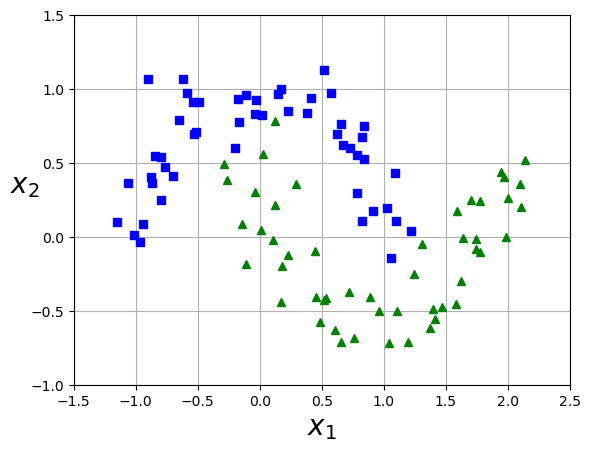

In [99]:
from sklearn.datasets import make_moons
X, y =make_moons(n_samples =100, noise =0.15,random_state =60)

def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True, which ="both")
    plt.xlabel(r"$x_1$", fontsize =20)
    plt.ylabel(r"$x_2$", fontsize =20, rotation =0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()
    

**Introducing pipeline**

In [102]:
Xs =np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys=np.array([0,0,1,1])

In [104]:
from sklearn.pipeline import Pipeline

In [106]:
svm_pipe = Pipeline([("scaler",StandardScaler()),
                     ("svm_clf_pipe", SVC(kernel ="linear", C=100))])

In [108]:
svm_pipe.fit(Xs,ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_pipe', SVC(C=100, kernel='linear'))])

In [110]:
#Accessing Individual Model
svm_pipe["svm_clf_pipe"]

SVC(C=100, kernel='linear')

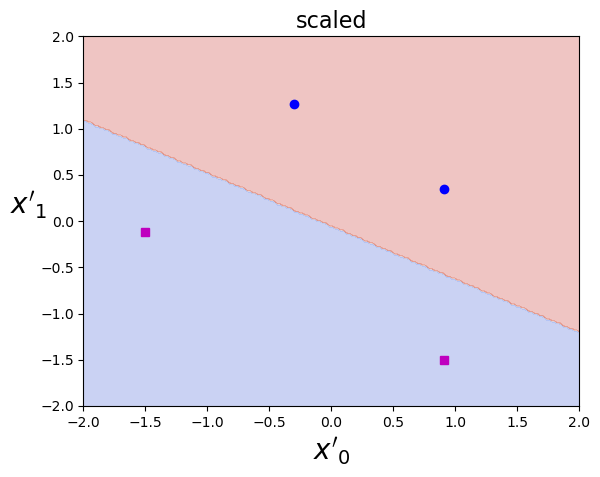

In [139]:
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_pipe["svm_clf_pipe"], -2,2)
plt.xlabel("$x'_0$", fontsize =20)
plt.ylabel("$x'_1$  ", fontsize =20, rotation=0)
plt.title("scaled", fontsize=16)
plt.axis([-2,2,-2,2]);

**Polynomial Feature**

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
import numpy as np
x = np.arange(1,4).reshape(-1,1)
x


array([[1],
       [2],
       [3]])

In [116]:
pf = PolynomialFeatures(degree =2)

In [118]:
pf.fit_transform(x)

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [120]:
pf = PolynomialFeatures(degree =3)

In [122]:
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

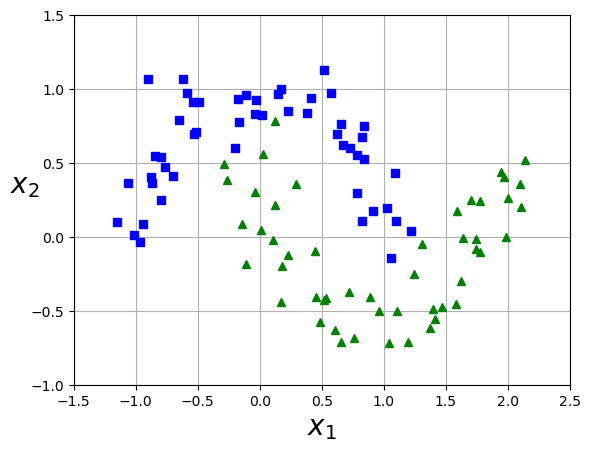

In [124]:
#bring back non linear classifier data
from sklearn.datasets import make_moons
from sklearn.datasets import make_moons
X, y =make_moons(n_samples =100, noise =0.15,random_state =60)

def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True, which ="both")
    plt.xlabel(r"$x_1$", fontsize =20)
    plt.ylabel(r"$x_2$", fontsize =20, rotation =0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()
    

In [126]:
#transforming it by the help of polynomial feature
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [128]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

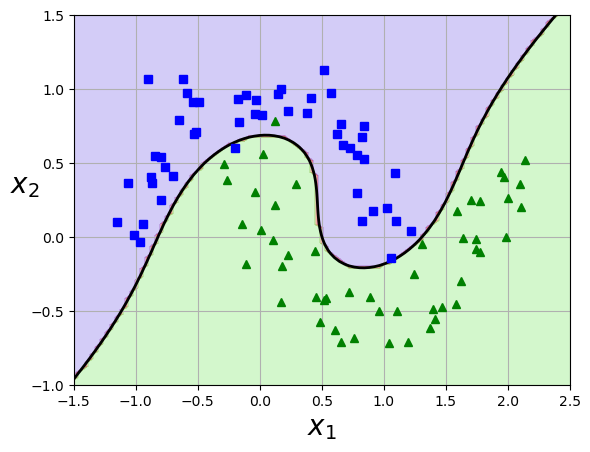

In [130]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]  # Ensure X has two features
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contour(x0, x1, y_decision, levels=[0], linewidths=2, colors='black')

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
